In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline

import pandas as pd 


In [2]:
input_path =  r"D:\mobile stuffs\mobile_phone_1000_rec_sent_score.csv"
output_path = r"D:\mobile stuffs\mobile_phone_1000_rec_sent_score_cleaned.csv"

df = pd.read_csv(input_path , encoding = "utf-8")
df.head(5)

,Mobile_name,Brand,Price,OS,Usage,Reviews,Purchase_link,Sentiment_Score
0,Asus ROG Phone 9,Asus,42472.93,Android,productivity,The charging is poor and the portability does ...,https://www.amazon.in/asus-mobile-phones,2
1,Galaxy A56,Samsung,42280.14,Android,productivity,"Moderate heating and acceptable portability, s...",https://www.amazon.in/samsung,4
2,Realme GT 6,Realme,94475.24,Android,productivity,The camera underperforms sometimes and the per...,https://www.amazon.in/realme,3
3,Vivo X100 Pro,Vivo,26643.29,Android,casual,The display feels okay and the audio delivers ...,https://www.flipkart.com/vivo-phones,3
4,Galaxy M55,Samsung,82498.62,Android,photography,Very frustrating software and the usability co...,https://www.amazon.in/samsung,5


In [3]:
vader= SentimentIntensityAnalyzer()
bert_model = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(review_text):
    if pd.isna(review_text) or review_text.strip() == "":
        return 0.0

    review_list = review_text.split("||")
    sentiment_sum = 0

    for r in review_list:
        score = analyzer.polarity_scores(r)
        sentiment_sum += score["compound"]

    avg_vader = sentiment_sum / len(review_list)
    return avg_vader


In [5]:
def bert_sentiment(review_text):
    if pd.isna(review_text) or review_text.strip() == "":
        return 0.0

    review_list = review_text.split("||")
    sentiment_sum = 0

    for r in review_list:
        result = bert_model(r)[0]   # get the prediction dictionary
        if result["label"] == "NEGATIVE":
            sentiment_sum += -result["score"]
        else:
            sentiment_sum += result["score"]

    avg_bert = sentiment_sum / len(review_list)
    return avg_bert


In [6]:
df["Sentiment_Score"] = df["Reviews"].apply(
    lambda x: (vader_sentiment(x) + bert_sentiment(x)) / 2
)


In [7]:
df.head(5)

,Mobile_name,Brand,Price,OS,Usage,Reviews,Purchase_link,Sentiment_Score
0,Asus ROG Phone 9,Asus,42472.93,Android,productivity,The charging is poor and the portability does ...,https://www.amazon.in/asus-mobile-phones,0.055587
1,Galaxy A56,Samsung,42280.14,Android,productivity,"Moderate heating and acceptable portability, s...",https://www.amazon.in/samsung,0.402479
2,Realme GT 6,Realme,94475.24,Android,productivity,The camera underperforms sometimes and the per...,https://www.amazon.in/realme,0.376852
3,Vivo X100 Pro,Vivo,26643.29,Android,casual,The display feels okay and the audio delivers ...,https://www.flipkart.com/vivo-phones,-0.101424
4,Galaxy M55,Samsung,82498.62,Android,photography,Very frustrating software and the usability co...,https://www.amazon.in/samsung,-0.532040


In [8]:
bins = [-1, -0.5, 0, 0.5, 1]
counts= pd.cut(df["Sentiment_Score"],bins = bins).value_counts().sort_index()
print(counts)

Sentiment_Score
(-1.0, -0.5]      8
(-0.5, 0.0]     442
(0.0, 0.5]      534
(0.5, 1.0]       16
Name: count, dtype: int64


In [9]:
df["Sentiment_Score"]= (df["Sentiment_Score"]+1)/2*100
df["Sentiment_Score"] = df["Sentiment_Score"].round(-1)

df.head(5)

,Mobile_name,Brand,Price,OS,Usage,Reviews,Purchase_link,Sentiment_Score
0,Asus ROG Phone 9,Asus,42472.93,Android,productivity,The charging is poor and the portability does ...,https://www.amazon.in/asus-mobile-phones,50.0
1,Galaxy A56,Samsung,42280.14,Android,productivity,"Moderate heating and acceptable portability, s...",https://www.amazon.in/samsung,70.0
2,Realme GT 6,Realme,94475.24,Android,productivity,The camera underperforms sometimes and the per...,https://www.amazon.in/realme,70.0
3,Vivo X100 Pro,Vivo,26643.29,Android,casual,The display feels okay and the audio delivers ...,https://www.flipkart.com/vivo-phones,40.0
4,Galaxy M55,Samsung,82498.62,Android,photography,Very frustrating software and the usability co...,https://www.amazon.in/samsung,20.0


In [10]:
bins = list(range(0,101,10))
counts= pd.cut(df["Sentiment_Score"],bins = bins).value_counts().sort_index()
print(counts)

Sentiment_Score
(0, 10]        0
(10, 20]       8
(20, 30]      70
(30, 40]     225
(40, 50]     292
(50, 60]     283
(60, 70]     106
(70, 80]      14
(80, 90]       2
(90, 100]      0
Name: count, dtype: int64


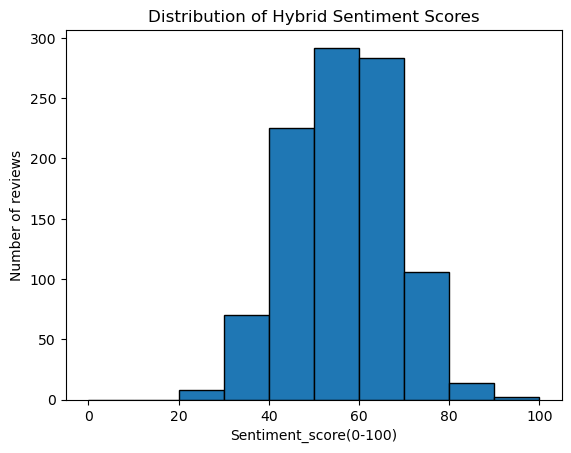

In [11]:
import matplotlib.pyplot as plt
bins = range(0,101,10)
plt.hist(df["Sentiment_Score"],bins= bins,edgecolor = 'black')
plt.xlabel("Sentiment_score(0-100)")
plt.ylabel("Number of reviews")
plt.title("Distribution of Hybrid Sentiment Scores")
plt.show()

In [16]:
df.to_csv(output_path,index=False)
print(f"CSV updated successfully at : {output_path}")


CSV updated successfully at : D:\mobile stuffs\mobile_phone_1000_rec_sent_score_cleaned.csv
